In [1]:
#import necessary libraries

import pandas as pd

In [3]:
#Load the car dataset

car_data = pd.read_csv('cars_data.csv')

In [6]:
#Display the first few rows of the dataset to understand its structure 

print(car_data.head())

   car_ID  symboling  CompanyName fueltype aspiration doornumber      carbody  \
0       1          3  alfa-romero      gas        std        two  convertible   
1       2          3  alfa-romero      gas        std        two  convertible   
2       3          1  alfa-romero      gas        std        two    hatchback   
3       4          2         audi      gas        std       four        sedan   
4       5          2         audi      gas        std       four        sedan   

  drivewheel enginelocation  wheelbase  ...  enginesize  fuelsystem  \
0        rwd          front       88.6  ...         130        mpfi   
1        rwd          front       88.6  ...         130        mpfi   
2        rwd          front       94.5  ...         152        mpfi   
3        fwd          front       99.8  ...         109        mpfi   
4        4wd          front       99.4  ...         136        mpfi   

   boreratio  stroke compressionratio horsepower  peakrpm citympg  highwaympg  \
0    

In [ ]:
#Calculate correlation matrix

car_data.corr()

In [10]:
#for simplicity, let's assume 'horsepower' and 'enginesize' are predictor features

X = car_data[['horsepower','enginesize']]
y = car_data['price']

In [11]:
X

,horsepower,enginesize
0,111,130
1,111,130
2,154,152
3,102,109
4,115,136
...,...,...
200,114,141
201,160,141
202,134,173
203,106,145


In [12]:
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [15]:
# Split the data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
train_test_split(X, y, test_size=0.2, random_state=42)

[     horsepower  enginesize
 66           72         134
 111          95         120
 153          62          92
 96           69          97
 38           86         110
 ..          ...         ...
 106         160         181
 14          121         164
 92           69          97
 179         161         171
 102         152         181
 
 [164 rows x 2 columns],
      horsepower  enginesize
 15          182         209
 9           160         131
 100          97         120
 132         110         121
 68          123         183
 95           69          97
 159          56         110
 162          70          98
 147          94         108
 182          52          97
 191         110         136
 164          70          98
 65          120         140
 175          92         122
 73          184         308
 152          62          92
 18           48          61
 82          145         156
 86           88         122
 143          94         108
 60           84

In [19]:
#initialize K-Nearest Neighbors Model with k=5

from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors = 5)

In [22]:
# Train the model

knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [25]:
#make predictions on the test set

y_pred = knn_model.predict(X_test)

In [34]:
y_pred

array([32032.6, 18637. , 13322.8, 14543. , 22527.8,  6782.8,  8279.2,
        7658. , 10841. ,  7227.6, 16565. ,  7658. , 17884. , 12673.8,
       36488. ,  6714.2,  6556.2, 15823. ,  8875.6, 10841. ,  9885.8,
       15837.2,  6782.8,  7075.4,  6495.8, 32032.6, 11771. , 17884. ,
        6782.8, 17884. , 22527.8,  6495.8,  6714.2, 22527.8,  8661.6,
       22527.8, 10832.2,  9992.4,  6878.5, 15823. ,  8024.4])

In [39]:
X_test

,horsepower,enginesize
15,182,209
9,160,131
100,97,120
132,110,121
68,123,183
95,69,97
159,56,110
162,70,98
147,94,108
182,52,97


In [40]:
y_test

15     30760.000
9      17859.167
100     9549.000
132    11850.000
68     28248.000
95      7799.000
159     7788.000
162     9258.000
147    10198.000
182     7775.000
191    13295.000
164     8238.000
65     18280.000
175     9988.000
73     40960.000
152     6488.000
18      5151.000
82     12629.000
86      8189.000
143     9960.000
60      8495.000
101    13499.000
98      8249.000
30      6479.000
25      6692.000
16     41315.000
168     9639.000
195    13415.000
97      7999.000
194    12940.000
67     25552.000
120     6229.000
154     7898.000
202    21485.000
79      7689.000
69     28176.000
145    11259.000
55     10945.000
45      8916.500
84     14489.000
146     7463.000
Name: price, dtype: float64

In [36]:
y_train

66     18344.0
111    15580.0
153     6918.0
96      7499.0
38      9095.0
        ...   
106    18399.0
14     24565.0
92      6849.0
179    15998.0
102    14399.0
Name: price, Length: 164, dtype: float64

In [31]:
# Evaluate the model

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [32]:
mse

7592663.018924123

In [33]:
r2

0.903822190277103

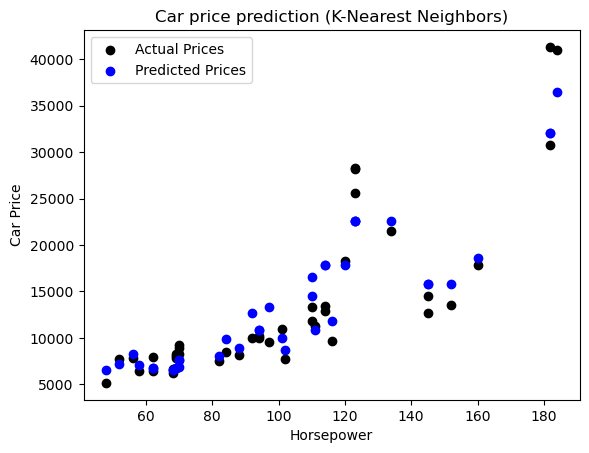

In [46]:
#Visualize the predictions against actual prices 

import matplotlib.pyplot as plt

plt.scatter(X_test['horsepower'], y_test, color='black', label='Actual Prices')
plt.scatter(X_test['horsepower'], y_pred, color='blue', label='Predicted Prices')
plt.xlabel('Horsepower')
plt.ylabel('Car Price')
plt.title('Car price prediction (K-Nearest Neighbors)')
plt.legend()
